In [23]:
file_prefix <- "ch19.2"
reuse_fit <- T
source("preset.R")

input_file <- "data/FruitflyDataReduced.csv"
x_name = "CompanionNumber"
covariate_names <- c("Thorax")

# prepare data

In [3]:
data <- read_csv(input_file) %>% mutate(
    CompanionNumber = factor(CompanionNumber), 
    cn_id = as.integer(CompanionNumber)
)

Parsed with column specification:
cols(
  Longevity = col_double(),
  CompanionNumber = col_character(),
  Thorax = col_double()
)



In [4]:
data

Longevity,CompanionNumber,Thorax,cn_id
<dbl>,<fct>,<dbl>,<int>
35,Pregnant8,0.64,3
37,Pregnant8,0.68,3
49,Pregnant8,0.68,3
46,Pregnant8,0.72,3
63,Pregnant8,0.72,3
39,Pregnant8,0.76,3
46,Pregnant8,0.76,3
56,Pregnant8,0.76,3
63,Pregnant8,0.76,3


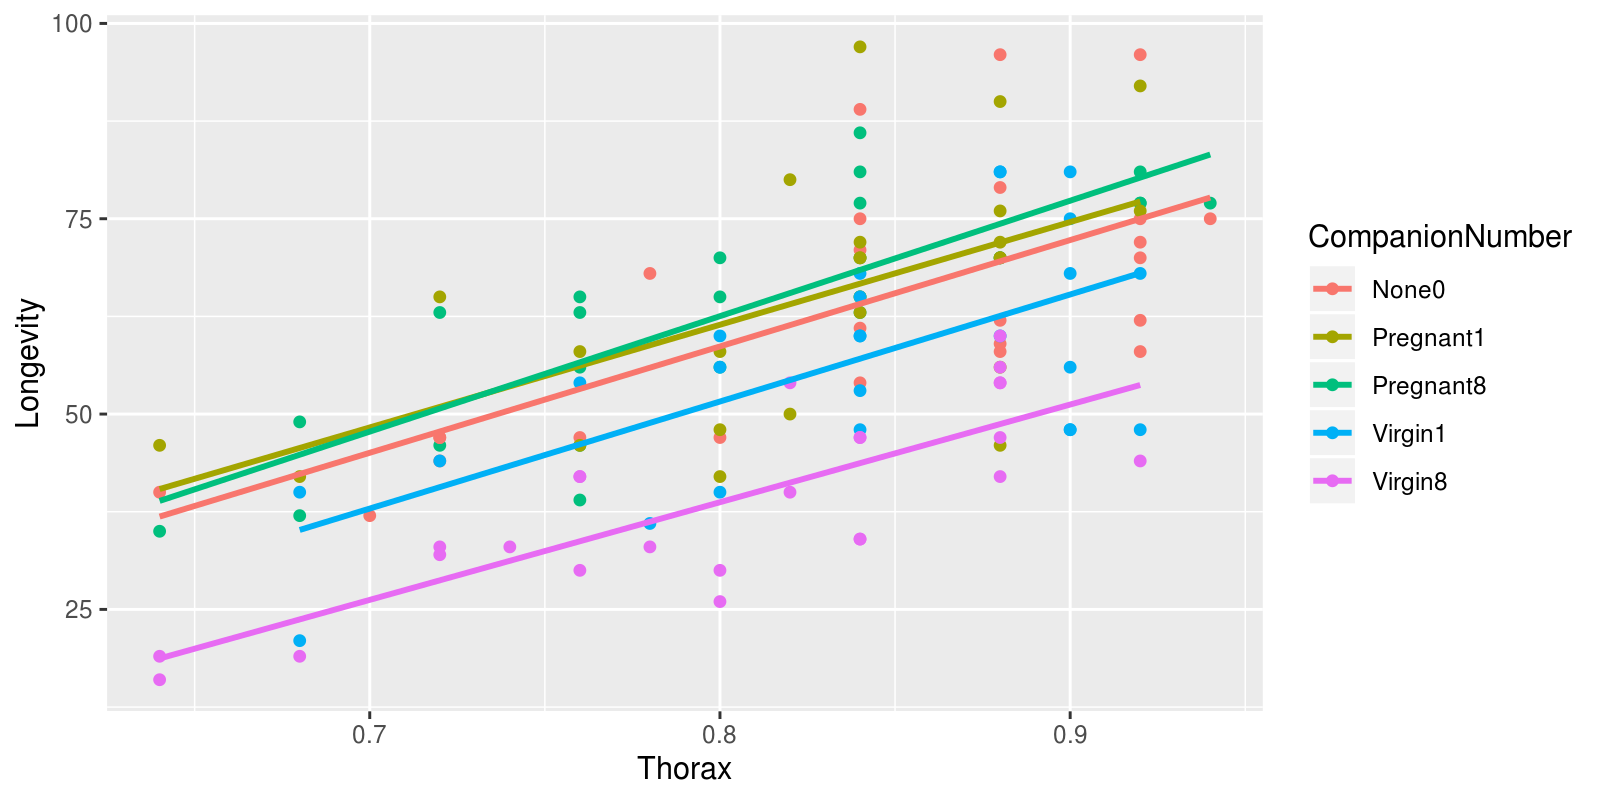

In [18]:
set_plot_size(8, 4)
ggplot(data, aes(Thorax, Longevity, color = CompanionNumber)) + 
    geom_point(alpha = 1) + 
    geom_smooth(method = "lm", se = F)

In [24]:
stan_data <- list(
    N = nrow(data), 
    K = n_distinct(data$CompanionNumber), 
    P = length(covariate_names), 
    x = as.integer(data$CompanionNumber), 
    cx = data %>% select(covariate_names) %>% mutate_all(standardize) %>% as.matrix(), 
    y = data$Longevity, 
    S_y = sd(data$Longevity), 
    M_y = mean(data$Longevity), 
    SIGMA_ALPHA_PARAMS = unlist(gammaShRaFromModeSD(sd(data$Longevity) / 2, sd(data$Longevity) * 2))
)

# model fit 

In [7]:
if (reuse_fit) {
    load(save_file_name("fit"))
} else {
    model <- stan_model(file = "ch19.2.stan")
    fit <- sampling(model, data = stan_data, seed = 123, 
                   chains = 4, warmup = 200, iter = 20000, thin = 4)
    save(model, fit, file = save_file_name("fit"))
}

recompiling to avoid crashing R session



# analize result

In [32]:
res <- fit_to_tibble(fit)
x_levels <- levels(data$CompanionNumber)
K <- length(x_levels)
P <- length(covariate_names)
coefs <- map_chr(1:K, ~paste0("beta_", .x))

## posteria of all parameters

In [34]:
res

alpha_0,alpha_1,alpha_2,alpha_3,alpha_4,alpha_5,betac_1,sigma,sigma_alpha,beta_0,beta_1,beta_2,beta_3,beta_4,beta_5,lp__
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
62.51310,-1.6322713,1.871950,3.4154861,-9.4208502,-19.538142,11.104510,9.657184,16.081924,57.45233,3.4284941,6.932716,8.476252,-4.36008478,-14.47738,-364.2156
55.68504,4.2165266,6.208408,8.7617470,-1.4298975,-11.601351,10.766893,10.726426,6.448473,56.91613,2.9854400,4.977321,7.530660,-2.66098406,-12.83244,-363.3945
54.77397,5.9887136,11.467750,10.5091774,2.3503304,-9.216847,11.247807,11.952593,7.362085,58.99379,1.7688886,7.247925,6.289352,-1.86949464,-13.43667,-367.3370
57.47092,5.1316007,8.278784,7.2540448,-0.8638804,-16.435014,10.361844,9.664418,7.677686,58.14403,4.4584938,7.605677,6.580938,-1.53698735,-17.10812,-364.2360
54.98409,5.0618061,7.629277,12.7626948,2.9878858,-13.357412,10.087845,11.973308,12.887385,58.00094,2.0449558,4.612426,9.745844,-0.02896456,-16.37426,-366.9634
60.00655,2.6092098,3.718920,5.5215985,-7.3969612,-19.459645,9.562051,11.365853,11.411269,57.00518,5.6105854,6.720295,8.522974,-4.39558565,-16.45827,-364.6024
59.56668,3.4867689,3.609055,4.8774898,-4.2003671,-17.460668,9.622584,10.298435,9.104730,57.62913,5.4243131,5.546599,6.815034,-2.26282292,-15.52312,-362.9230
58.05664,3.8905051,3.296838,8.1286530,-3.0101903,-15.789301,10.280460,9.688061,7.892469,57.35994,4.5872042,3.993537,8.825352,-2.31349117,-15.09260,-363.7196
68.04099,-7.0490163,-3.613702,-5.4033980,-7.6946033,-27.501877,10.324461,10.107828,20.851479,57.78847,3.2035031,6.638817,4.849121,2.55791614,-17.24936,-369.4750


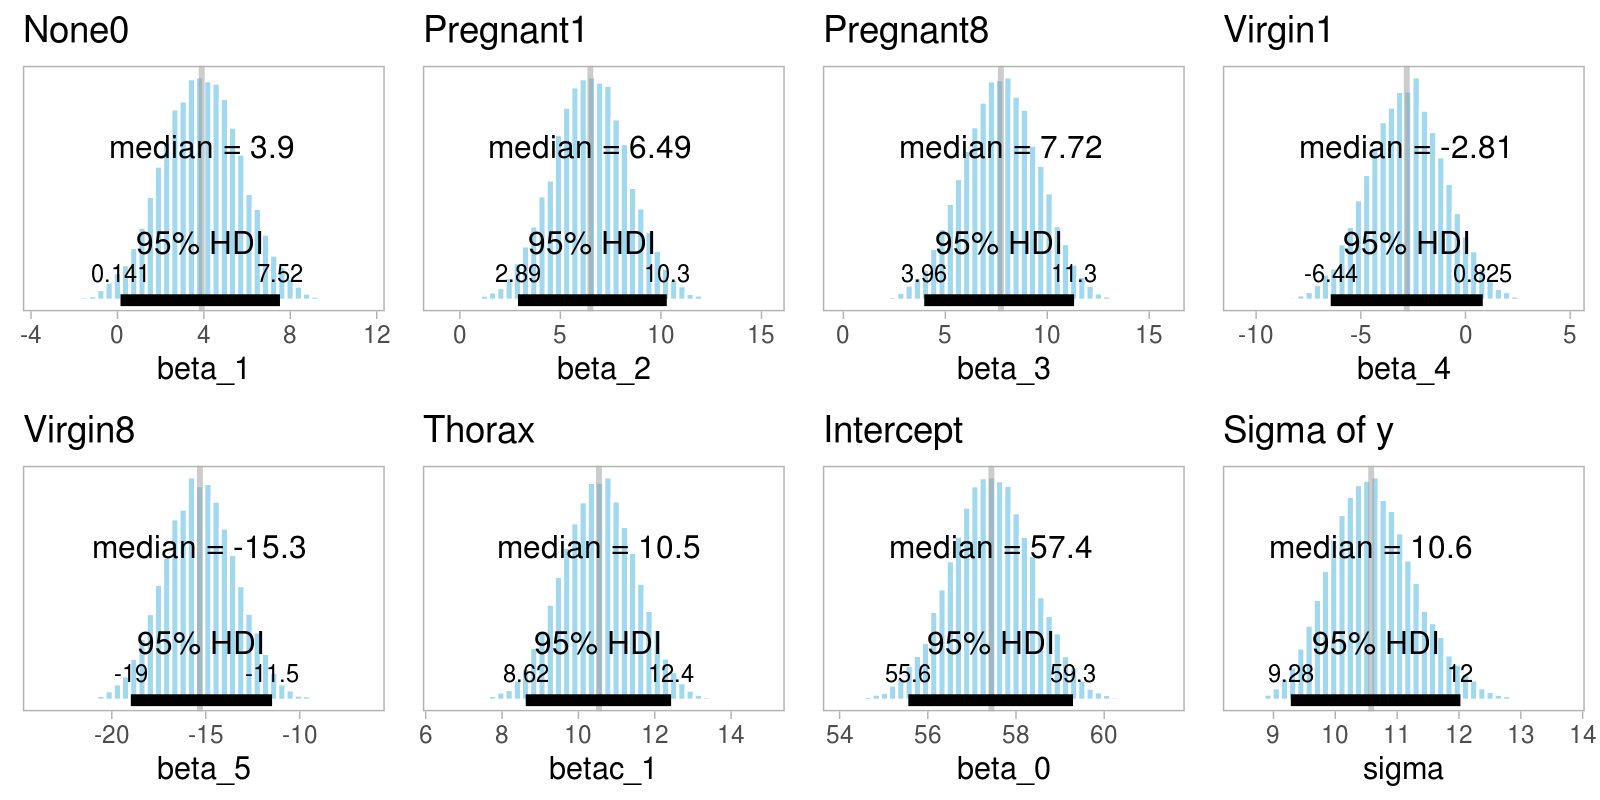

In [36]:
set_plot_size(8, 4)
coeffs <- map_chr(1:5, ~"beta_" %+% .x)
coeff_x_names <- levels(data$CompanionNumber)
params = c(coeffs, "betac_1", "beta_0", "sigma")
titles = c(coeff_x_names, covariate_names, "Intercept", "Sigma of y")
grid.arrange(
    grobs = map2(params, titles, ~plot_post(res, .x, title = .y)), 
    ncol = 4
)

## pair-wise diff of betas

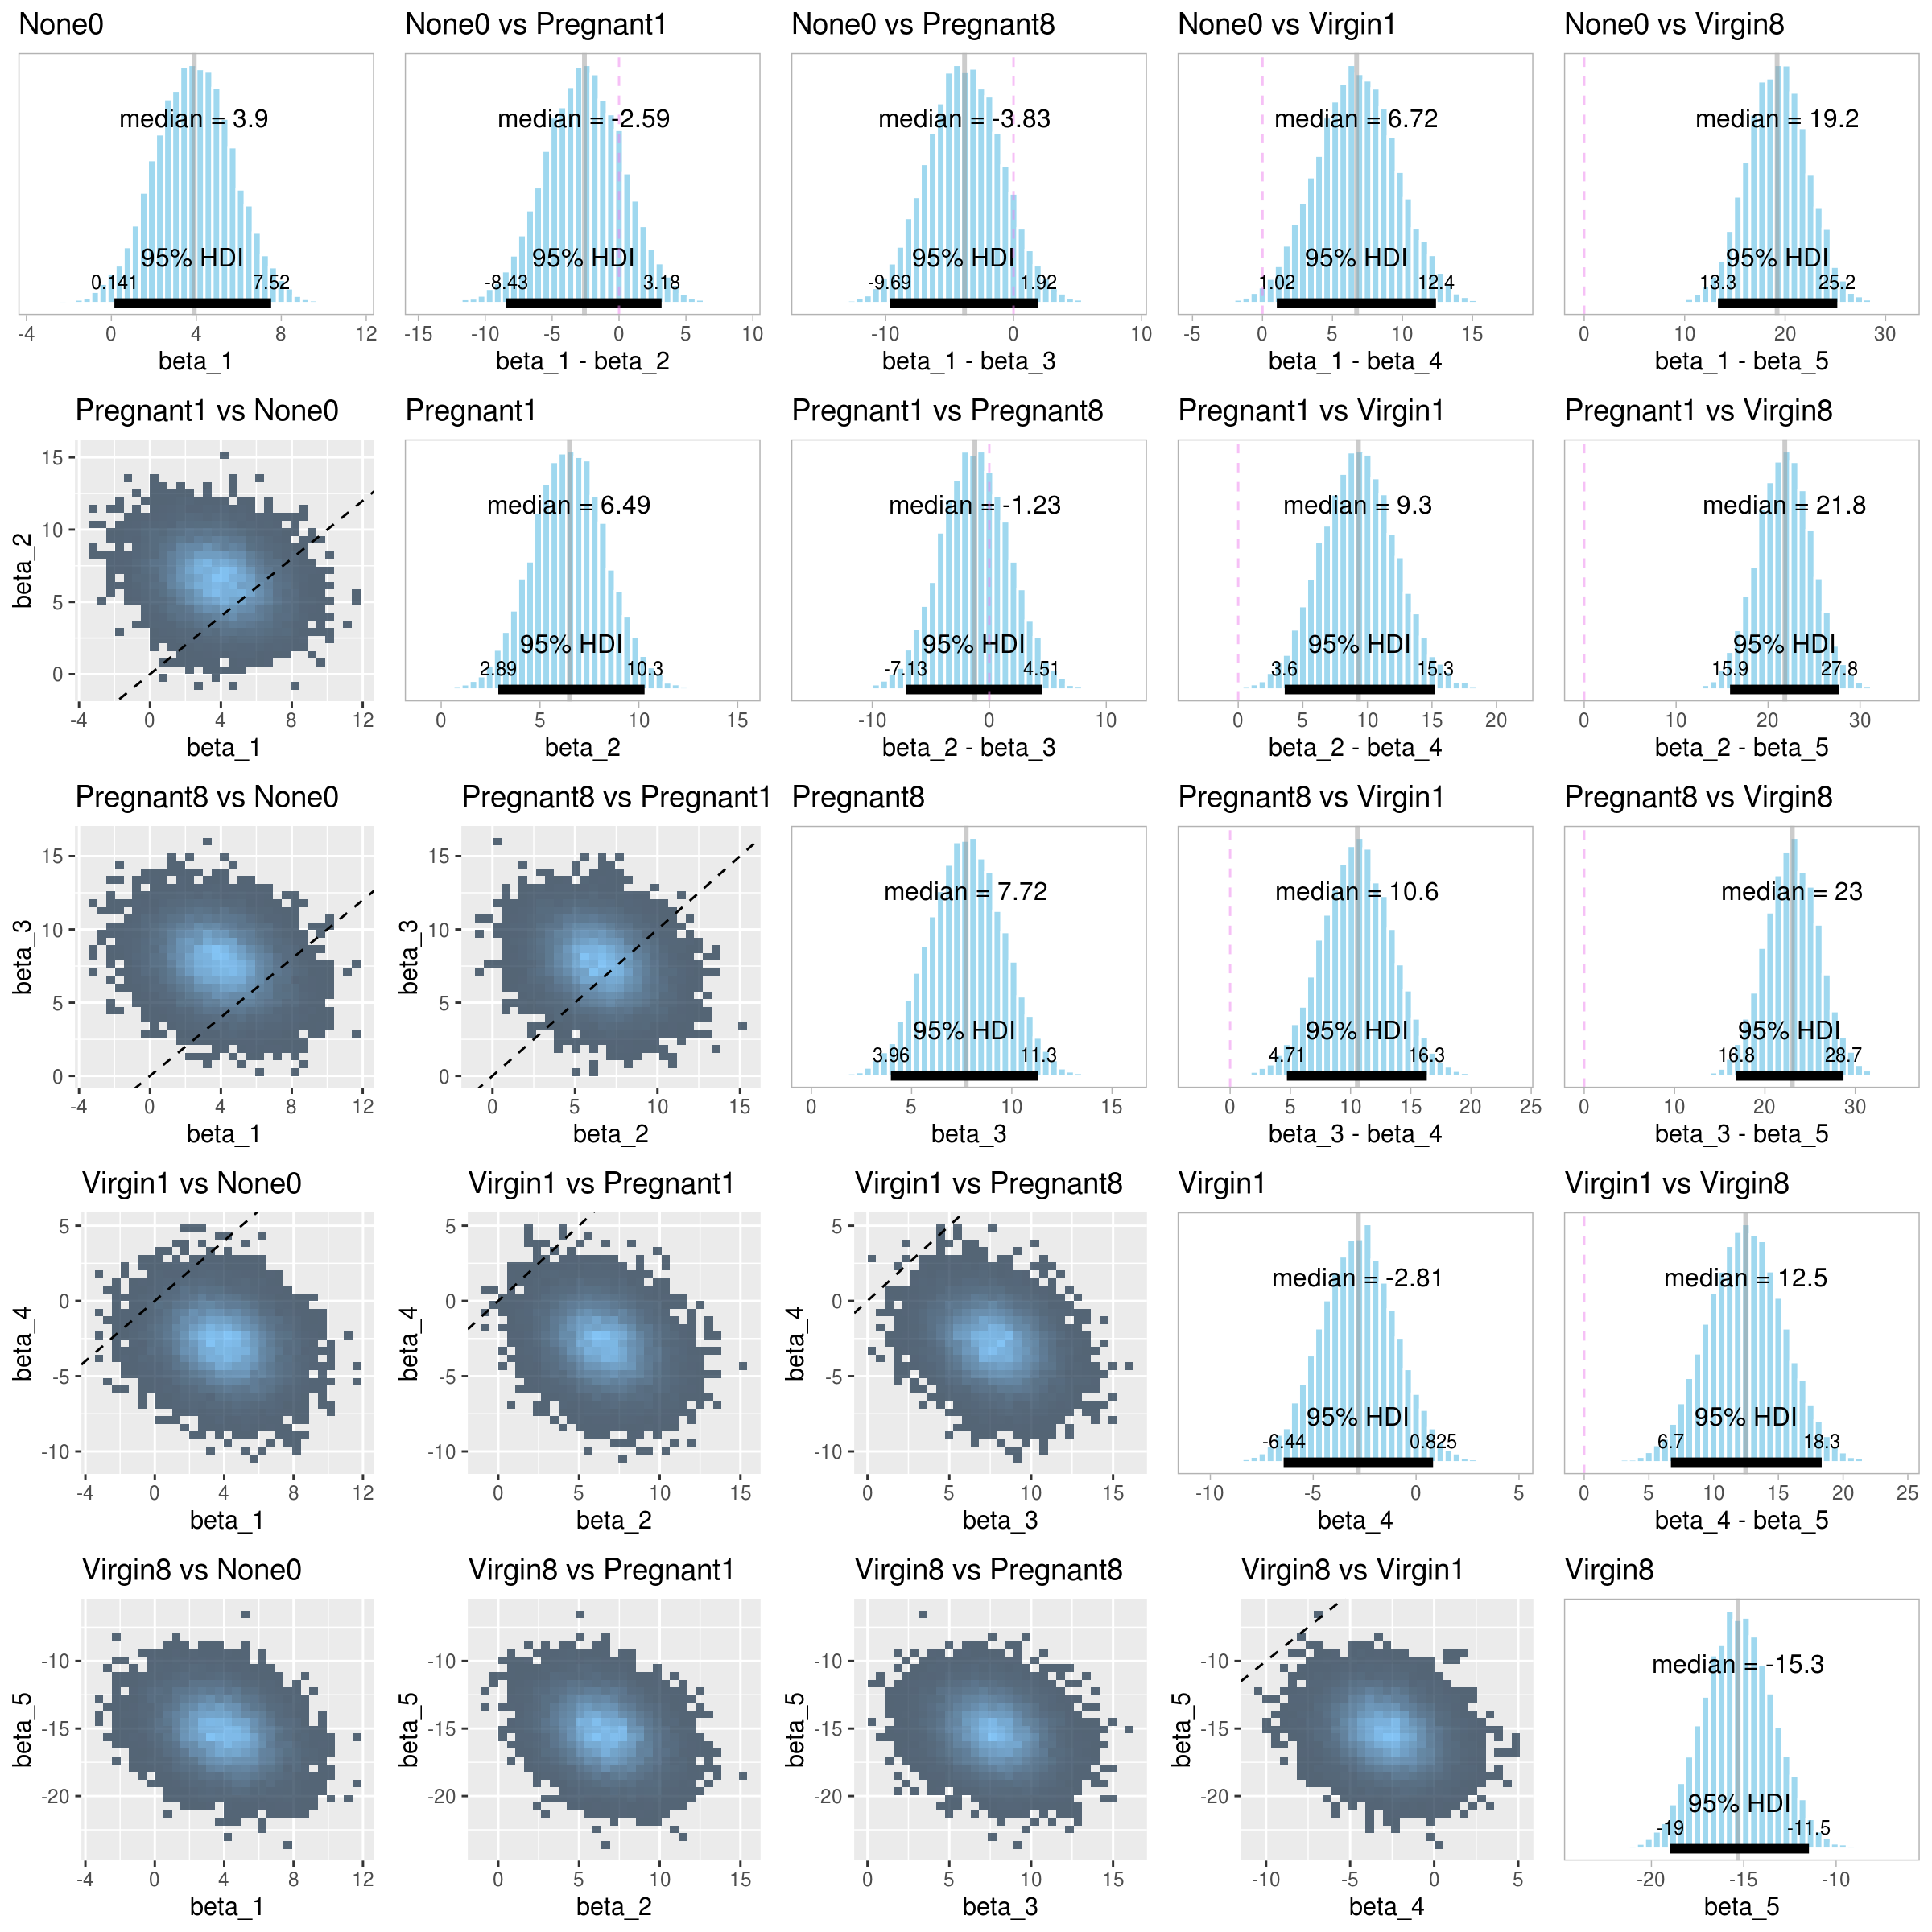

In [37]:
set_plot_size(12, 12)
plot_post_pair_diff(res, 1:5, "beta", t_names = x_levels)

## contrast

In [38]:
make_contrast_title <- function(g1, g2) {
    paste(g1, collapse = ".") %+% " vs " %+% paste(g2, collapse = ".")
}
make_group_diff_data <- function(res, g1, g2) {
    g1_mean <- res %>% select(name_to_coef(g1, x_levels, "beta_")) %>% rowMeans()
    g2_mean <- res %>% select(name_to_coef(g2, x_levels, "beta_")) %>% rowMeans()
    tibble(g1 = g1_mean, g2 = g2_mean)
}
plot_post_by_contrast <- function(res, g1, g2, rope = NULL) {
    make_group_diff_data(res, g1, g2) %>% 
        mutate(diff = g1 - g2) %>% 
        plot_post("diff", rope = rope, title = make_contrast_title(g1, g2))
}
plot_post_by_contrast_effect_size <- function(res, g1, g2, rope = NULL) {
    sigma = res$sigma
    make_group_diff_data(res, g1, g2) %>% 
        mutate(effective_size = (g1 - g2) / sigma) %>% 
        plot_post("effective_size", rope = rope, title = make_contrast_title(g1, g2))
}

In [39]:
contrasts = list( 
  list(g1 = c("Pregnant1", "Pregnant8"), g2 = c("None0")), 
  list(g1 = c("Pregnant1", "Pregnant8", "None0"), g2 = c("Virgin1")), 
  list(g1 = c("Virgin1"), g2 = c("Virgin8")), 
  list(g1 = c("Pregnant1", "Pregnant8", "None0"), g2 = c("Virgin1", "Virgin8"))
)

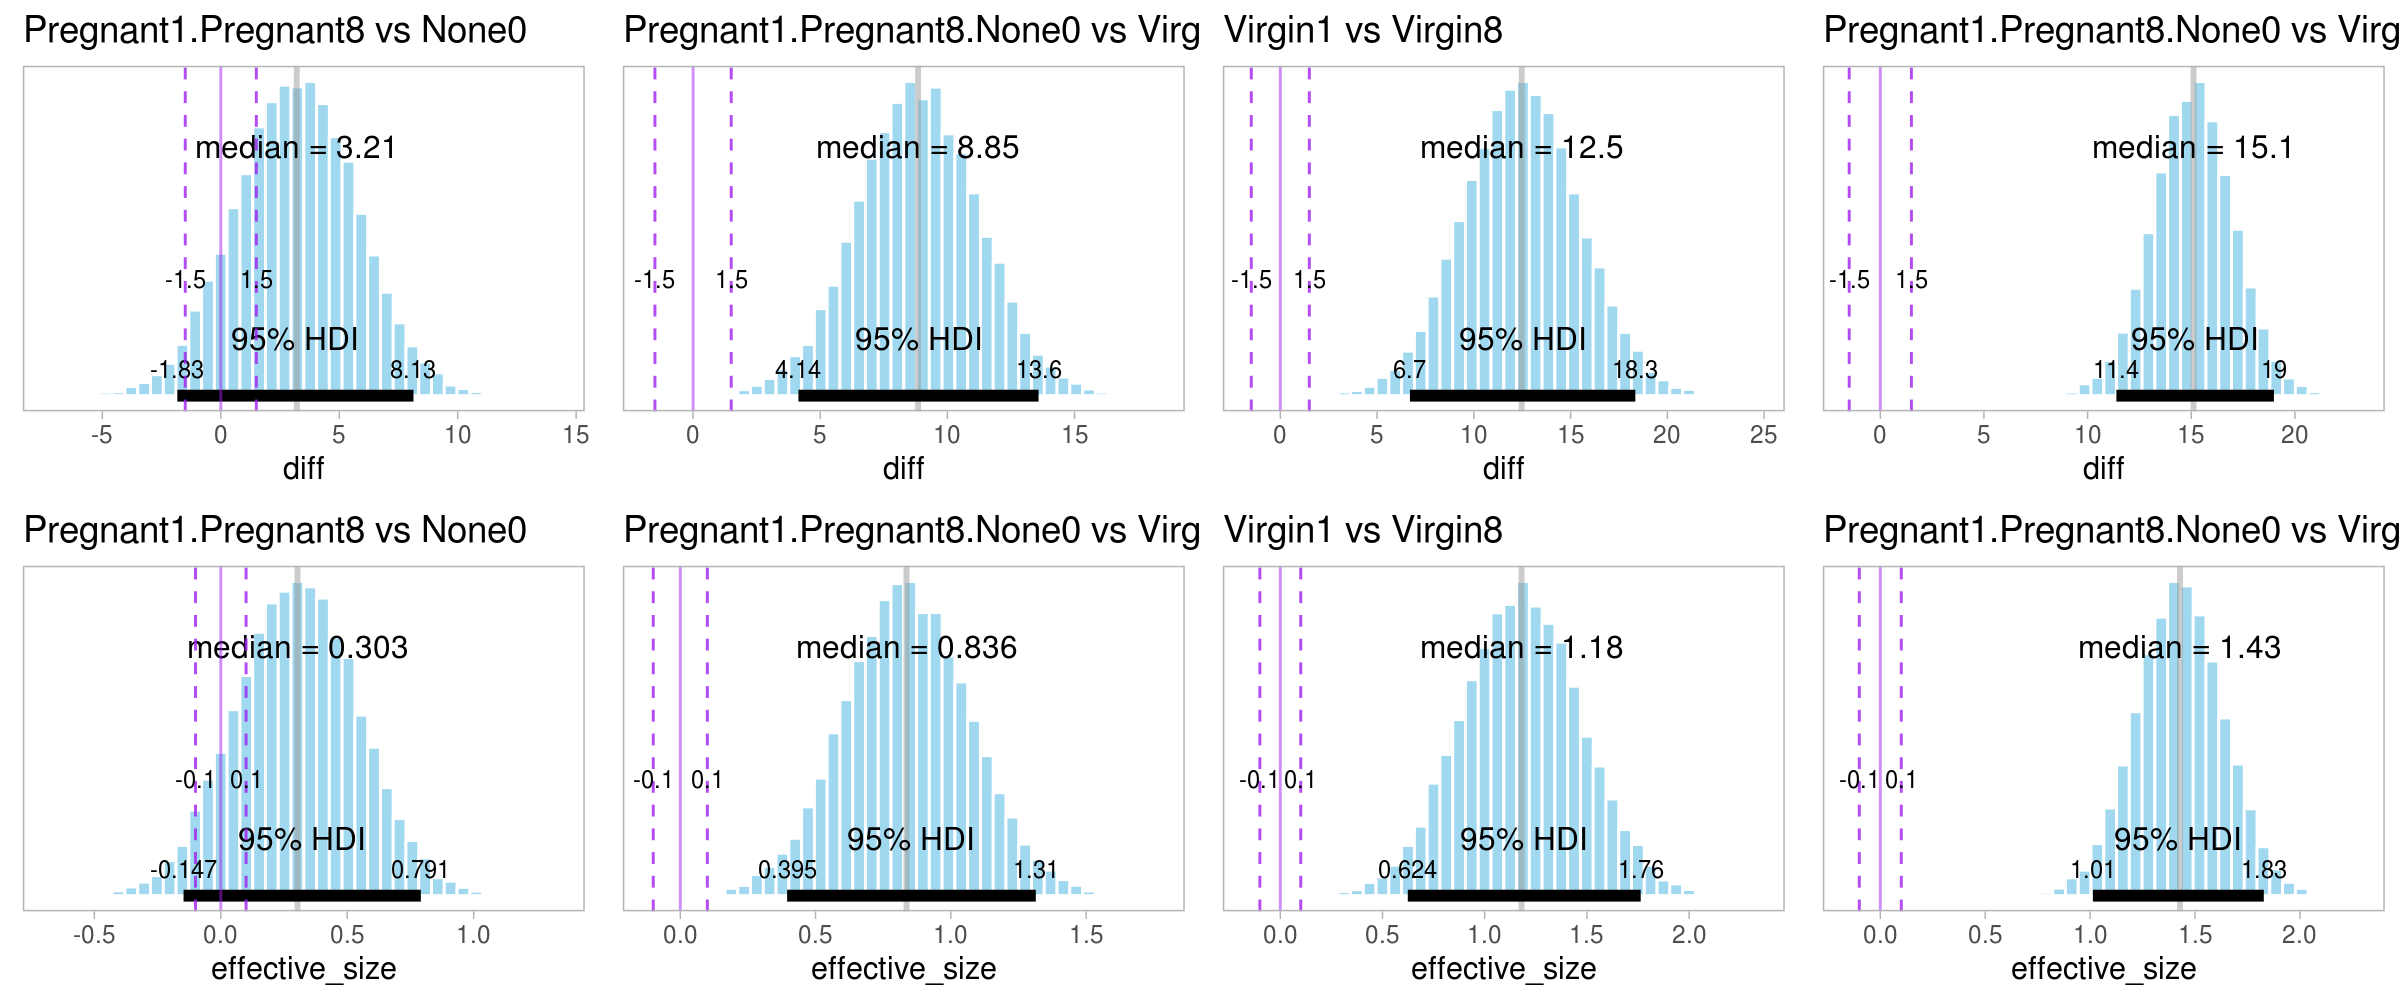

In [44]:
set_plot_size(12, 5)
grid.arrange(
    grobs = c(
        map(contrasts, ~plot_post_by_contrast(res, .x$g1, .x$g2, rope = c(-1.5, 1.5))), 
        map(contrasts, ~plot_post_by_contrast_effect_size(res, .x$g1, .x$g2, rope = c(-0.1, 0.1)))
    ), 
    ncol = 4
)